In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
#pd.set_option('display.max_colwidth', -1)  # or 199
pd.set_option('float_format', '{:,.2f}'.format)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_pickle('BASE PREPARADA MODELO.pkl')

In [3]:
def logistic_regression_versao(in_versao, in_X_train, in_y_train, in_X_test, in_y_test, in_tune = False, in_multi= False):
    print(f'############### {in_versao} ###############')
    #Fit Logistic Regression model:
    X_train = in_X_train
    y_train = in_y_train
    
    X_test = in_X_test
    y_test = in_y_test
    logisticregression = LogisticRegression().fit(X_train, y_train)

    if in_tune:
        print('tuning...')
        # Set the regularization strength (C parameter)
        logisticregression.C = 0.1
        # Set the learning rate (solver parameter)
        logisticregression.solver = 'sag'
        logisticregression.max_iter = 1000
        # Set the optimization algorithm
        logisticregression.solver = 'lbfgs'

    #
    print('  ')
    print('#################')
    print('Validar o modelo')
    print('  ')
    print("training set score: %f" % logisticregression.score(X_train, y_train))
    print("test set score: %f" % logisticregression.score(X_test, y_test))
    # Make predictions on the test set
    y_pred = logisticregression.predict(X_test)
    # Calculate accuracy, precision, recall, and F1-score
    print('  ')
    print('#################')
    print('Métrica geral')
    print('  ')
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}%".format(precision * 100))
    print("Recall: {:.2f}%".format(recall * 100))
    print("F1-score: {:.2f}%".format(f1 * 100))

    # assuming y_true and y_pred are your true and predicted labels, respectively
    report = classification_report(y_test, y_pred)
    print('  ')
    print('#################')
    print('Classification Report')
    print('  ')
    print(report)

    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
    print('  ')
    print('#################')
    print('Matriz de confusão')
    print('  ')
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print('  ')
    print('#################')
    print('ROC AUC')
    print('  ')

    # Assuming y_test and y_pred are the true labels and predicted labels, respectively
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Plot the ROC curve
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (AUC = {auc:.2f})')
    plt.show()


In [4]:
ratio = 0.30

In [5]:
X = df.drop(['target'], axis=1)
y = df['target']
#Data split into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio)
print('Distribuição das classes:', Counter(y))

Distribuição das classes: Counter({0: 16883, 1: 3101})


In [6]:
############### Feature selection ###############
from sklearn.feature_selection import SelectKBest, f_classif

feature_selector = SelectKBest(score_func=f_classif, k=10)
X_train_new = feature_selector.fit_transform(X_train, y_train)
X_test_new = feature_selector.fit_transform(X_test, y_test)


In [7]:
############### Com balanceamento###############

# Cria objeto SMOTE
smote = SMOTE(random_state=42)

# Realiza oversampling das classes minoritárias
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verifica distribuição das classes após oversampling
print('Distribuição das classes após oversampling:', Counter(y_resampled))

#Data split into train and test:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size=ratio)

Distribuição das classes após oversampling: Counter({0: 16883, 1: 16883})


############### Sem balanceamento 2 classes Fine Tuning False ###############
  
#################
Validar o modelo
  
training set score: 0.846797
test set score: 0.841728
  
#################
Métrica geral
  
Accuracy: 84.17%
Precision: 65.29%
Recall: 50.74%
F1-score: 47.52%
  
#################
Classification Report
  
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      5050
           1       0.46      0.02      0.04       946

    accuracy                           0.84      5996
   macro avg       0.65      0.51      0.48      5996
weighted avg       0.78      0.84      0.78      5996

  
#################
Matriz de confusão
  


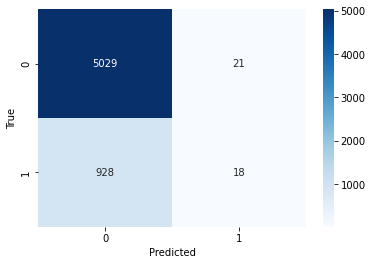

  
#################
ROC AUC
  


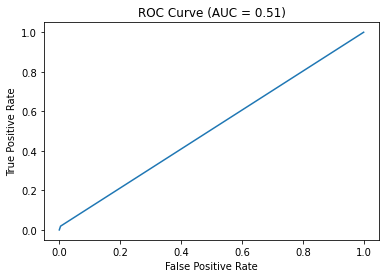

############### Sem balanceamento 2 classes Fine Tuning True ###############
tuning...
  
#################
Validar o modelo
  
training set score: 0.846797
test set score: 0.841728
  
#################
Métrica geral
  
Accuracy: 84.17%
Precision: 65.29%
Recall: 50.74%
F1-score: 47.52%
  
#################
Classification Report
  
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      5050
           1       0.46      0.02      0.04       946

    accuracy                           0.84      5996
   macro avg       0.65      0.51      0.48      5996
weighted avg       0.78      0.84      0.78      5996

  
#################
Matriz de confusão
  


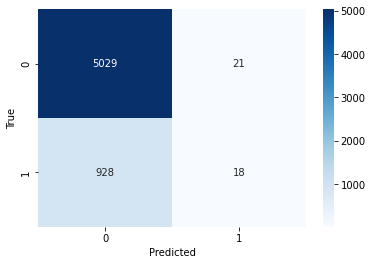

  
#################
ROC AUC
  


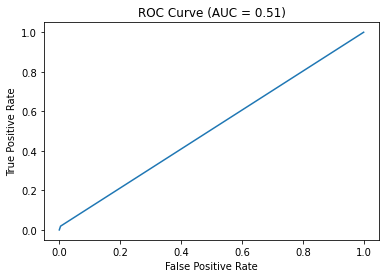

############### feature selector Fine Tuning False ###############
  
#################
Validar o modelo
  
training set score: 0.845939
test set score: 0.842228
  
#################
Métrica geral
  
Accuracy: 84.22%
Precision: 42.11%
Recall: 50.00%
F1-score: 45.72%
  
#################
Classification Report
  
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      5050
           1       0.00      0.00      0.00       946

    accuracy                           0.84      5996
   macro avg       0.42      0.50      0.46      5996
weighted avg       0.71      0.84      0.77      5996

  
#################
Matriz de confusão
  


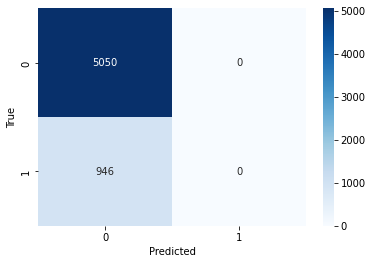

  
#################
ROC AUC
  


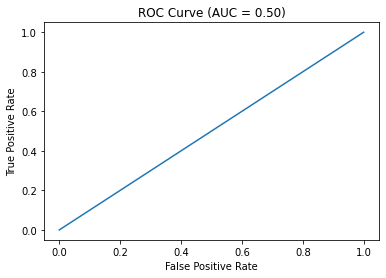

############### feature selector Fine Tuning True ###############
tuning...
  
#################
Validar o modelo
  
training set score: 0.845939
test set score: 0.842228
  
#################
Métrica geral
  
Accuracy: 84.22%
Precision: 42.11%
Recall: 50.00%
F1-score: 45.72%
  
#################
Classification Report
  
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      5050
           1       0.00      0.00      0.00       946

    accuracy                           0.84      5996
   macro avg       0.42      0.50      0.46      5996
weighted avg       0.71      0.84      0.77      5996

  
#################
Matriz de confusão
  


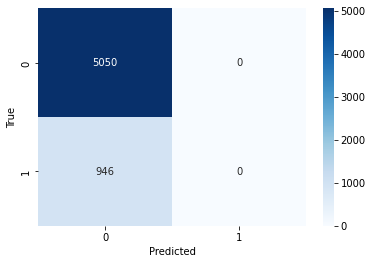

  
#################
ROC AUC
  


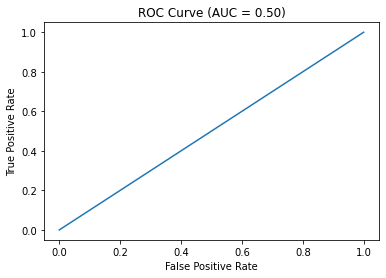

############### Com balanceamento Fine Tuning False ###############
  
#################
Validar o modelo
  
training set score: 0.681630
test set score: 0.675420
  
#################
Métrica geral
  
Accuracy: 67.54%
Precision: 67.54%
Recall: 67.54%
F1-score: 67.54%
  
#################
Classification Report
  
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5026
           1       0.68      0.68      0.68      5104

    accuracy                           0.68     10130
   macro avg       0.68      0.68      0.68     10130
weighted avg       0.68      0.68      0.68     10130

  
#################
Matriz de confusão
  


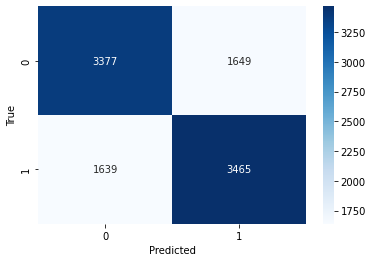

  
#################
ROC AUC
  


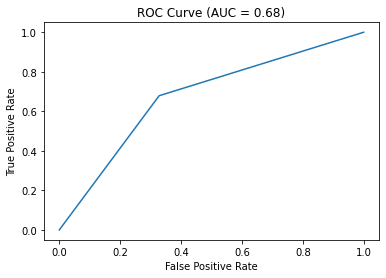

############### Com balanceamento Fine Tuning False ###############
tuning...
  
#################
Validar o modelo
  
training set score: 0.681630
test set score: 0.675420
  
#################
Métrica geral
  
Accuracy: 67.54%
Precision: 67.54%
Recall: 67.54%
F1-score: 67.54%
  
#################
Classification Report
  
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5026
           1       0.68      0.68      0.68      5104

    accuracy                           0.68     10130
   macro avg       0.68      0.68      0.68     10130
weighted avg       0.68      0.68      0.68     10130

  
#################
Matriz de confusão
  


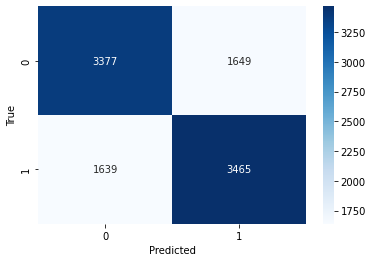

  
#################
ROC AUC
  


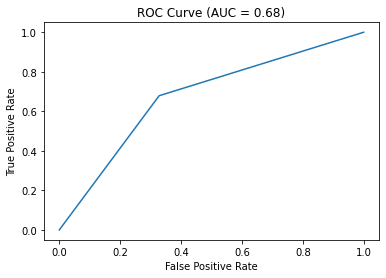

In [8]:
logistic_regression_versao('Sem balanceamento 2 classes Fine Tuning False',X_train, y_train, X_test,y_test,in_tune=False)
logistic_regression_versao('Sem balanceamento 2 classes Fine Tuning True',X_train, y_train, X_test,y_test,in_tune=True)
logistic_regression_versao('feature selector Fine Tuning False',X_train_new, y_train, X_test_new,y_test,in_tune=False)
logistic_regression_versao('feature selector Fine Tuning True',X_train_new, y_train, X_test_new,y_test,in_tune=True)
logistic_regression_versao('Com balanceamento Fine Tuning False',X_train_re, y_train_re, X_test_re,y_test_re,False)
logistic_regression_versao('Com balanceamento Fine Tuning False',X_train_re, y_train_re, X_test_re,y_test_re, True)

Precisão: A precisão para cada classe mede a proporção de verdadeiros positivos entre os exemplos que o modelo previu pertencer a essa classe. Uma pontuação de precisão alta para uma determinada classe indica que o modelo identificou corretamente uma grande proporção dos exemplos que realmente pertencem a essa classe, enquanto minimiza o número de falsos positivos. Em outras palavras, nos diz o quão confiáveis são as previsões positivas do modelo para aquela classe em particular. Uma pontuação de precisão baixa para uma determinada classe indica que o modelo está fazendo muitas previsões falsos positivos para aquela classe, o que pode levar a consequências negativas ou custos mais elevados. Por exemplo, em uma tarefa de análise de sentimento multiclasse, uma pontuação de precisão alta para a classe negativa indicaria que o modelo está identificando com precisão o sentimento negativo, o que pode ser importante para o serviço ao cliente ou a melhoria do produto.

Recall: O recall para cada classe mede a proporção de verdadeiros positivos entre todos os exemplos que realmente pertencem a essa classe. Uma pontuação de recall alta para uma determinada classe indica que o modelo é capaz de identificar a maioria dos exemplos que realmente pertencem a essa classe, mesmo que também identifique alguns falsos positivos. Em outras palavras, nos diz o quão bom o modelo é em encontrar todos os casos positivos para aquela classe em particular. Uma pontuação de recall baixa para uma determinada classe indica que o modelo está perdendo muitos dos exemplos que realmente pertencem a essa classe, o que pode levar a oportunidades perdidas ou menor desempenho. Por exemplo, em uma tarefa de classificação de imagens multiclasse, uma pontuação de recall alta para a classe rara indicaria que o modelo é capaz de identificar a maioria dos exemplos daquela classe, o que pode ser importante para a segurança ou a proteção.

F1-score: O F1-score para cada classe é um equilíbrio entre precisão e recall para aquela classe em particular. Nos diz como o modelo é capaz de encontrar todos os casos positivos para aquela classe em particular, minimizando as previsões falsos positivos. Uma pontuação de F1 alta para uma determinada classe indica que o modelo é bom tanto em precisão quanto em recall para aquela classe, enquanto uma pontuação de F1 baixa indica que o modelo está faltando em uma ou ambas as métricas. Um negócio pode usar o F1-score para cada classe como uma métrica geral do desempenho do modelo, especialmente em situações em que tanto a precisão quanto o recall são importantes para aquela classe em particular. Por exemplo, em uma tarefa de classificação multiclasse para diagnóstico médico, um F1-score alto para a classe de doença rara indicaria que o modelo está identificando com precisão a maioria dos casos daquela doença, evitando alarmes falsos.